<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/101food_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-08 09:12:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-08 09:12:02 (83.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2025-01-08 09:12:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G  22.2MB/s    in 71s     

2025-01-08 09:13:22 (22.0 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [4]:
unzip_data("101_food_classes_10_percent.zip")

In [5]:
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"

In [6]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/red_velvet_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/filet_mignon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/scallops'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/onion_rings'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/cheesecake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/poutine'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ceviche'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/grilled_cheese_sandwich'.
There are 0 directories and 75 i

In [7]:
import tensorflow as tf

train_Data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    image_size = (224,224)
)

test_Data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode = 'categorical',
    batch_size = 32,
    shuffle = False,
    image_size = (224,224)
)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## train model

In [8]:
#creating checkpoint callback
chck_path = "model_check.weights.h5"

chck = tf.keras.callbacks.ModelCheckpoint (chck_path, save_best_only=True, save_weights_only=True, monitor ='val_accuracy')

In [9]:
#setting up data augment
data_aug = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.2)
])

In [10]:
# setting up base model
base = tf.keras.applications.EfficientNetB0(include_top = False)
base.trainable = False

In [11]:
inputs = tf.keras.layers.Input(shape=(224,224,3))

x = data_aug(inputs)

x = base(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(101, activation = "softmax")(x)

model_1 = tf.keras.Model(inputs, outputs)

In [12]:
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [13]:
hist = model_1.fit(train_Data,
                       epochs = 5,
                       validation_data = test_Data,
                       callbacks = [chck, create_tensorboard_callback("exp","ftl_10_pec")])

Saving TensorBoard log files to: exp/ftl_10_pec/20250108-091347
Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 118s 439ms/step - accuracy: 0.1262 - loss: 4.0682 - val_accuracy: 0.4221 - val_loss: 2.5587
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 101s 428ms/step - accuracy: 0.4156 - loss: 2.5937 - val_accuracy: 0.4886 - val_loss: 2.1047
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 143s 434ms/step - accuracy: 0.5001 - loss: 2.1427 - val_accuracy: 0.5138 - val_loss: 1.9319
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 144s 441ms/step - accuracy: 0.5415 - loss: 1.9186 - val_accuracy: 0.5306 - val_loss: 1.8350
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 123s 363ms/step - accuracy: 0.5703 - loss: 1.7499 - val_accuracy: 0.5387 - val_loss: 1.7777


##Fine tuning

In [14]:
# unfreeze the last 5 layers in base
for layers in base.layers[-5:]:
  layers.trainable = True

In [15]:
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics = ['accuracy'])

In [16]:
for i,layers in enumerate(base.layers):
  print(i, layers, layers.trainable)

0 <InputLayer name=input_layer, built=True> False
1 <Rescaling name=rescaling, built=True> False
2 <Normalization name=normalization, built=True> False
3 <Rescaling name=rescaling_1, built=True> False
4 <ZeroPadding2D name=stem_conv_pad, built=True> False
5 <Conv2D name=stem_conv, built=True> False
6 <BatchNormalization name=stem_bn, built=True> False
7 <Activation name=stem_activation, built=True> False
8 <DepthwiseConv2D name=block1a_dwconv, built=True> False
9 <BatchNormalization name=block1a_bn, built=True> False
10 <Activation name=block1a_activation, built=True> False
11 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True> False
12 <Reshape name=block1a_se_reshape, built=True> False
13 <Conv2D name=block1a_se_reduce, built=True> False
14 <Conv2D name=block1a_se_expand, built=True> False
15 <Multiply name=block1a_se_excite, built=True> False
16 <Conv2D name=block1a_project_conv, built=True> False
17 <BatchNormalization name=block1a_project_bn, built=True> False
18 <Conv2D 

In [17]:
hist_1 = model_1.fit(train_Data,
                   epochs = 10,
                   validation_data = test_Data,
                   callbacks = [create_tensorboard_callback("exp","ftl_10_pec_fine")],
                   initial_epoch = 5)

Saving TensorBoard log files to: exp/ftl_10_pec_fine/20250108-092417
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 120s 460ms/step - accuracy: 0.5803 - loss: 1.7557 - val_accuracy: 0.5553 - val_loss: 1.7033
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 79s 332ms/step - accuracy: 0.6292 - loss: 1.5218 - val_accuracy: 0.5656 - val_loss: 1.6552
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 87s 356ms/step - accuracy: 0.6423 - loss: 1.4294 - val_accuracy: 0.5719 - val_loss: 1.6216
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 135s 329ms/step - accuracy: 0.6651 - loss: 1.3645 - val_accuracy: 0.5778 - val_loss: 1.5939
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 107s 433ms/step - accuracy: 0.6781 - loss: 1.2982 - val_accuracy: 0.5813 - val_loss: 1.5764


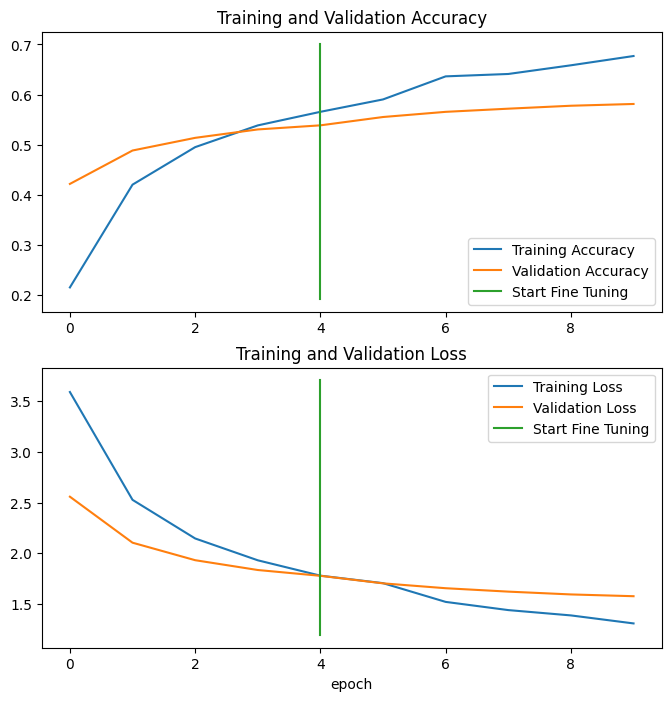

In [18]:
compare_historys(hist,hist_1, 5)

In [19]:
pred_probs = model_1.predict(test_Data, verbose = 1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 63s 77ms/step


In [20]:
pred_probs.shape

(25250, 101)

In [21]:
pred_probs[:10]

array([[3.22817504e-01, 9.13232274e-04, 1.85228407e-01, ...,
        1.20247903e-04, 1.42578746e-03, 4.66224626e-02],
       [7.44784474e-01, 8.12522558e-06, 9.42722615e-03, ...,
        2.52530444e-03, 3.54293161e-06, 1.19250471e-04],
       [3.65982473e-01, 1.48808339e-03, 3.17412987e-03, ...,
        1.17885426e-03, 4.60808282e-04, 2.61511072e-03],
       ...,
       [2.72561967e-01, 1.21021085e-05, 2.18476471e-03, ...,
        1.30770251e-01, 2.13027786e-04, 5.80667518e-04],
       [9.71994102e-02, 1.12862652e-03, 9.30495635e-02, ...,
        1.23868464e-03, 4.16134222e-04, 4.63493867e-04],
       [3.45282257e-01, 9.87941439e-06, 2.34790426e-03, ...,
        9.23894998e-03, 2.39440669e-05, 3.04297823e-03]], dtype=float32)

In [22]:
pred_classes = tf.argmax(pred_probs, axis = 1)

In [23]:
pred_classes

<tf.Tensor: shape=(25250,), dtype=int64, numpy=array([  0,   0,   0, ...,  56, 100, 100])>

## gettting all test labels

In [24]:
labels = []
for img, label in test_Data.unbatch():
  labels.append(int(tf.argmax(label)))

In [25]:
labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [26]:
labels = tf.constant(labels)

In [27]:
import sklearn
import matplotlib.pyplot as plt

In [28]:
sklearn.metrics.accuracy_score(labels, pred_classes)

0.5813069306930693

## plot confusion matrix

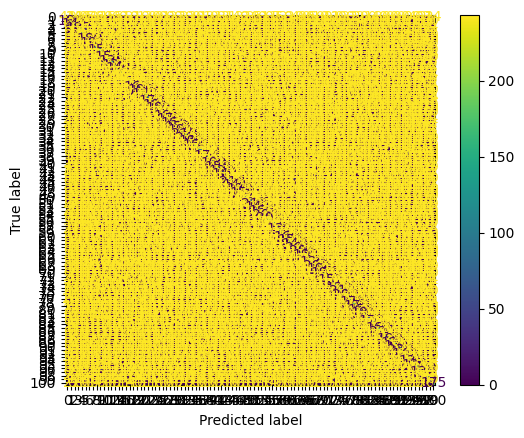

In [29]:
conf = sklearn.metrics.confusion_matrix(labels, pred_classes)


disp =sklearn.metrics.ConfusionMatrixDisplay(conf)
disp.plot()

## classification report

In [30]:
print(sklearn.metrics.classification_report(labels, pred_classes))

              precision    recall  f1-score   support

           0       0.37      0.16      0.23       250
           1       0.47      0.72      0.57       250
           2       0.60      0.56      0.58       250
           3       0.74      0.49      0.59       250
           4       0.57      0.40      0.47       250
           5       0.36      0.37      0.37       250
           6       0.71      0.76      0.73       250
           7       0.76      0.77      0.77       250
           8       0.30      0.43      0.35       250
           9       0.39      0.61      0.47       250
          10       0.47      0.40      0.43       250
          11       0.57      0.61      0.59       250
          12       0.75      0.55      0.64       250
          13       0.47      0.55      0.50       250
          14       0.46      0.58      0.51       250
          15       0.41      0.30      0.35       250
          16       0.68      0.48      0.57       250
          17       0.39    

In [31]:
rep = sklearn.metrics.classification_report(labels, pred_classes, output_dict =True)

In [32]:
rep

{'0': {'precision': 0.37272727272727274,
  'recall': 0.164,
  'f1-score': 0.22777777777777777,
  'support': 250.0},
 '1': {'precision': 0.4699738903394256,
  'recall': 0.72,
  'f1-score': 0.5687203791469194,
  'support': 250.0},
 '2': {'precision': 0.597457627118644,
  'recall': 0.564,
  'f1-score': 0.5802469135802469,
  'support': 250.0},
 '3': {'precision': 0.7365269461077845,
  'recall': 0.492,
  'f1-score': 0.5899280575539568,
  'support': 250.0},
 '4': {'precision': 0.5738636363636364,
  'recall': 0.404,
  'f1-score': 0.47417840375586856,
  'support': 250.0},
 '5': {'precision': 0.36470588235294116,
  'recall': 0.372,
  'f1-score': 0.3683168316831683,
  'support': 250.0},
 '6': {'precision': 0.7132075471698113,
  'recall': 0.756,
  'f1-score': 0.7339805825242719,
  'support': 250.0},
 '7': {'precision': 0.7649402390438247,
  'recall': 0.768,
  'f1-score': 0.7664670658682635,
  'support': 250.0},
 '8': {'precision': 0.3,
  'recall': 0.432,
  'f1-score': 0.3540983606557377,
  'suppo

In [33]:
import pandas as pd

df_results = pd.DataFrame(rep).transpose()
df_results

precision    recall  f1-score       support
0              0.372727  0.164000  0.227778    250.000000
1              0.469974  0.720000  0.568720    250.000000
2              0.597458  0.564000  0.580247    250.000000
3              0.736527  0.492000  0.589928    250.000000
4              0.573864  0.404000  0.474178    250.000000
...                 ...       ...       ...           ...
99             0.369128  0.220000  0.275689    250.000000
100            0.575658  0.700000  0.631769    250.000000
accuracy       0.581307  0.581307  0.581307      0.581307
macro avg      0.589349  0.581307  0.576152  25250.000000
weighted avg   0.589349  0.581307  0.576152  25250.000000

[104 rows x 4 columns]

In [34]:
df_results.iloc[0:101]

precision  recall  f1-score  support
0     0.372727   0.164  0.227778    250.0
1     0.469974   0.720  0.568720    250.0
2     0.597458   0.564  0.580247    250.0
3     0.736527   0.492  0.589928    250.0
4     0.573864   0.404  0.474178    250.0
..         ...     ...       ...      ...
96    0.529762   0.356  0.425837    250.0
97    0.691489   0.520  0.593607    250.0
98    0.394309   0.388  0.391129    250.0
99    0.369128   0.220  0.275689    250.0
100   0.575658   0.700  0.631769    250.0

[101 rows x 4 columns]

<BarContainer object of 101 artists>

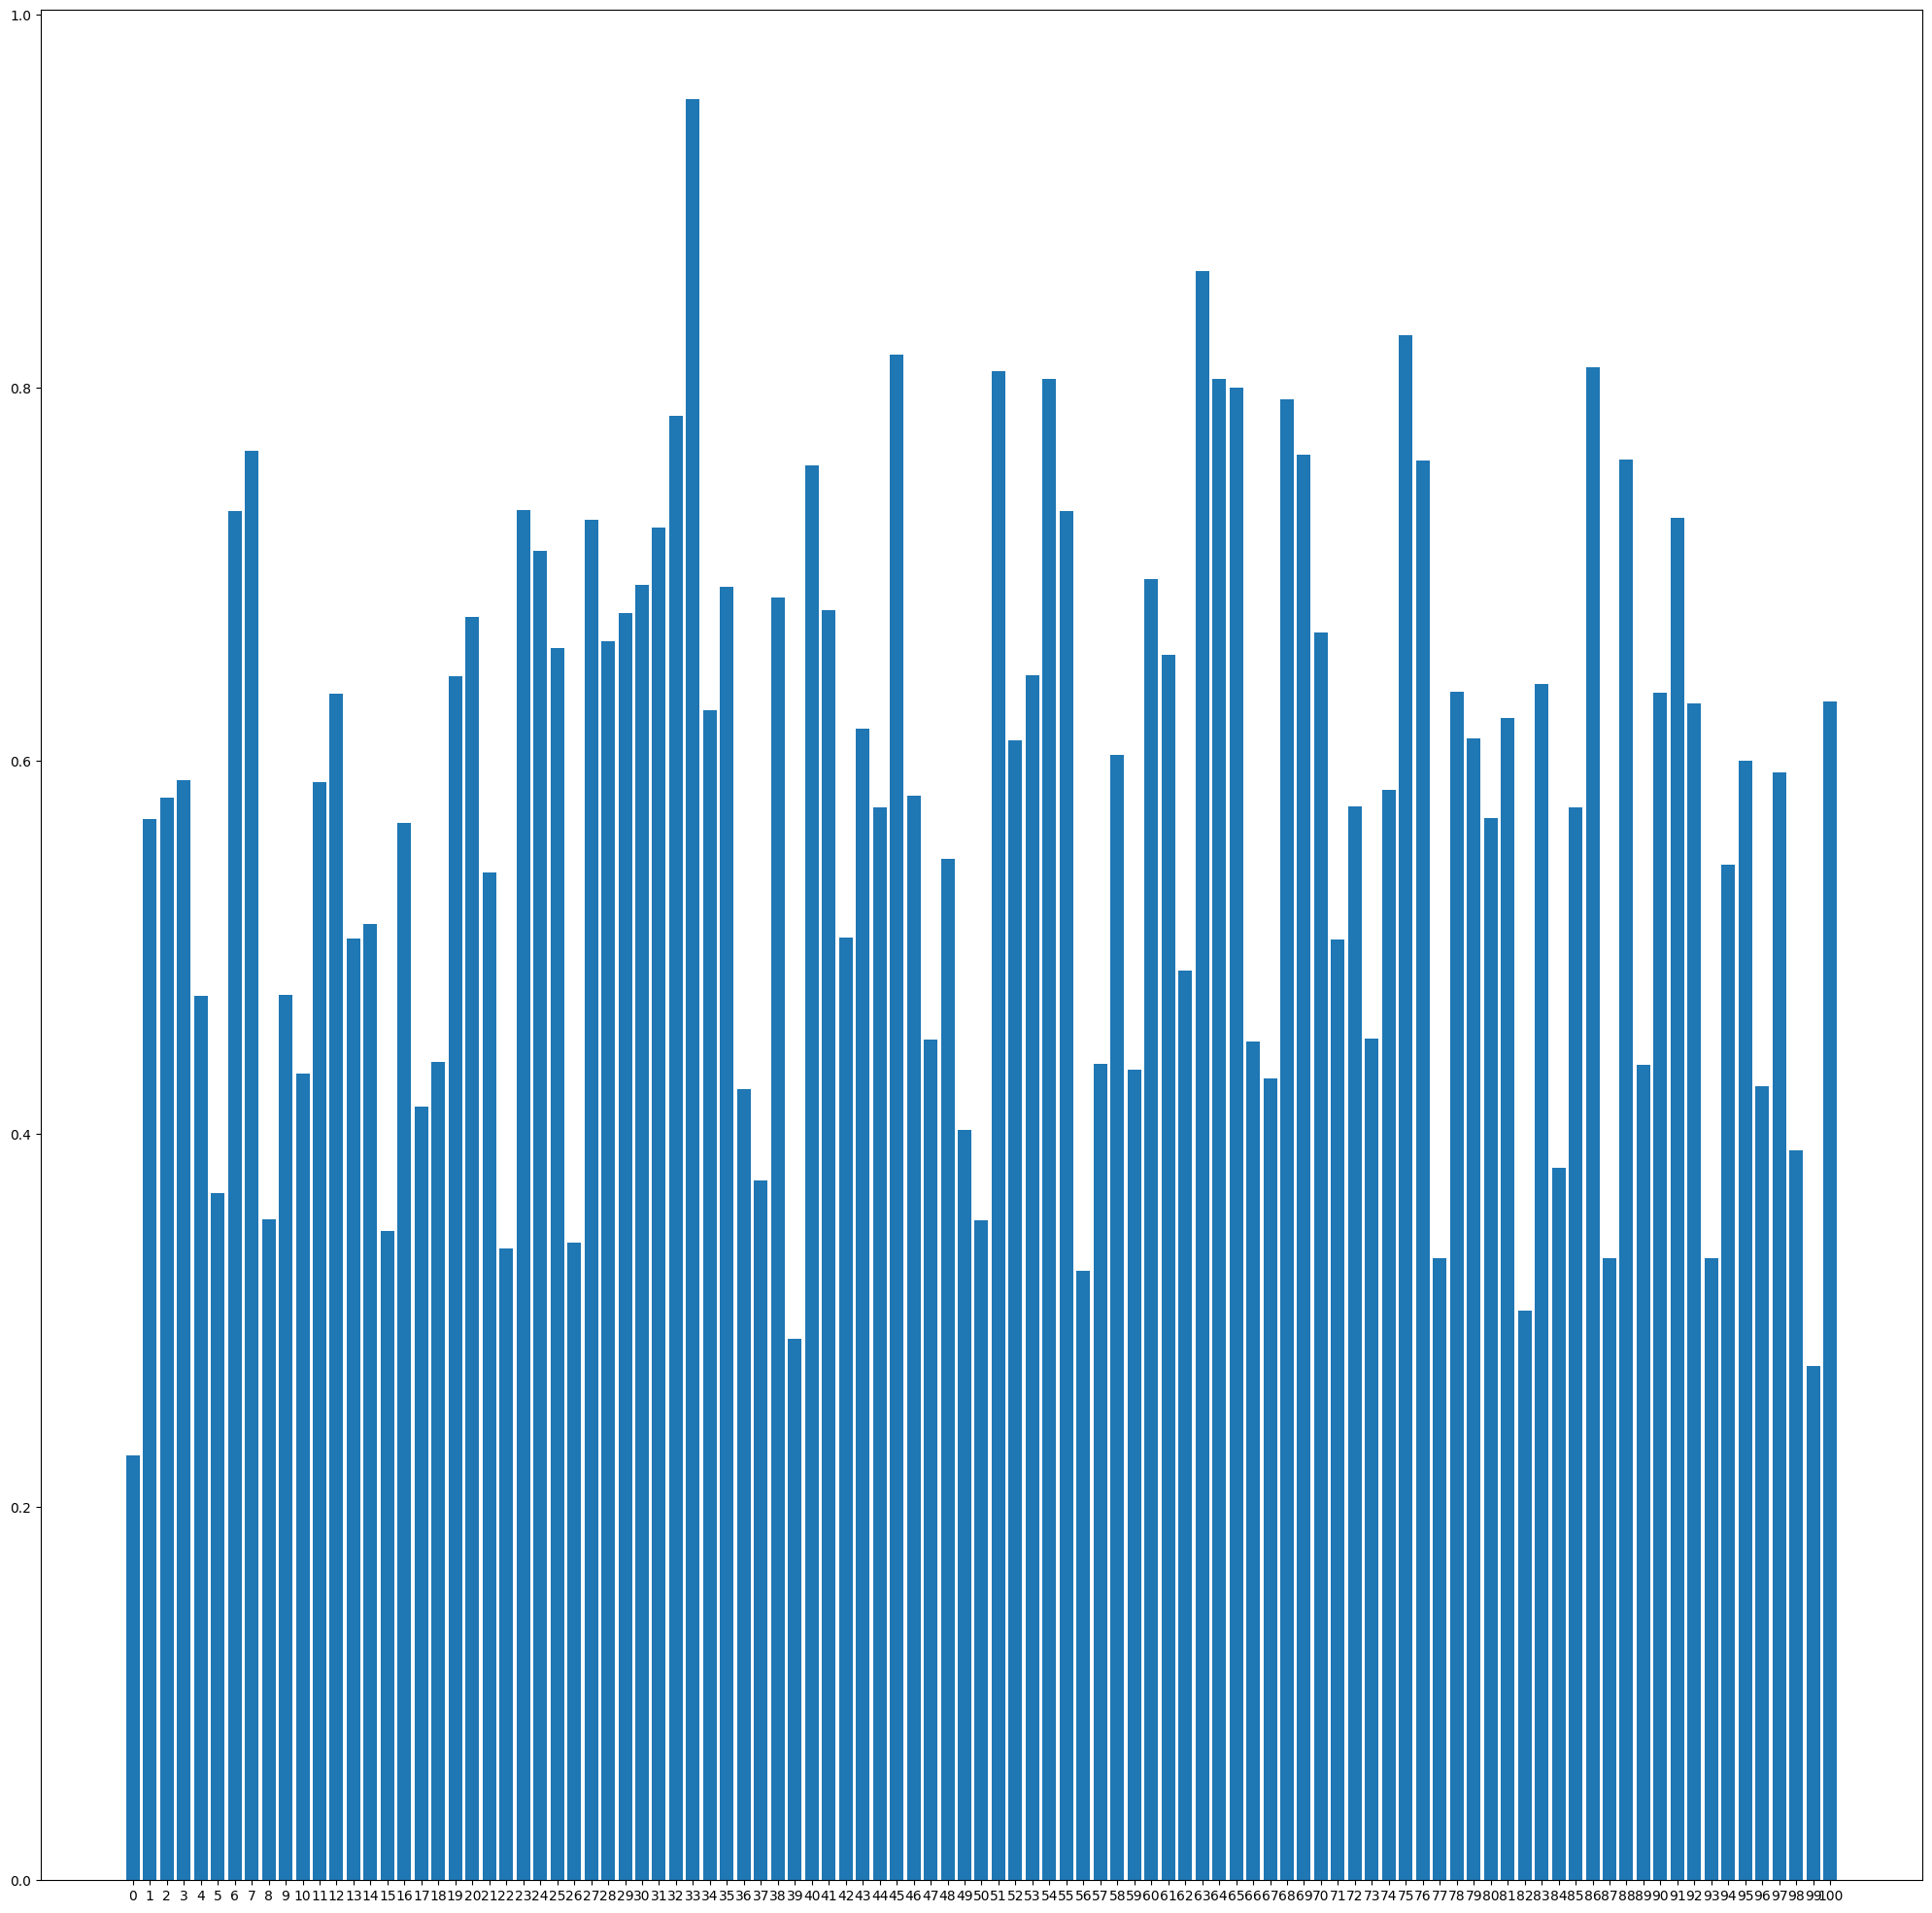

In [35]:
plt.figure(figsize=(25,25))
plt.bar(x = df_results.iloc[0:101].index, height = df_results.iloc[0:101]['f1-score'])

## making a function to make predictions on random images

In [38]:
def load_prep_images(file_name):
  """
  Reads in an image and prepares it
  """

  img = tf.io.read_file(file_name)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, (224,224))


  return img

101_food_classes_10_percent/test/eggs_benedict/3513327.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
101_food_classes_10_percent/test/tacos/3152735.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
101_food_classes_10_percent/test/tuna_tartare/3169363.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


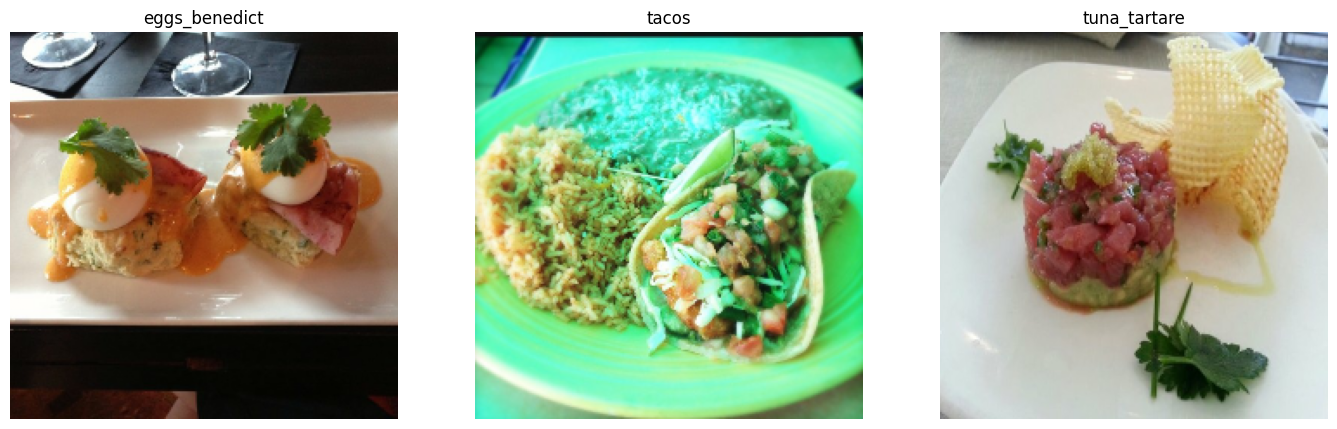

In [39]:
import random
import os

plt.figure(figsize=(17,10))

for i in range(1,4):
  class_name = random.choice(test_Data.class_names)
  filename = random.choice(os.listdir(test_dir+"/"+class_name))
  path = test_dir +"/"+ class_name + "/" + filename
  print(path)
  img = load_prep_images(path)

  plt.subplot(1,3,i)
  plt.imshow(img/255.)
  plt.title(test_Data.class_names[int(tf.argmax(model_1.predict(tf.expand_dims(img, axis = 0)), axis = 1))])
  plt.axis('off')



## Finding most wrong predictions

In [40]:
filepaths =[]
for filepath in test_Data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle = False):
  filepaths.append(filepath.numpy())

In [41]:
filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [43]:
tf.constant([test_Data.class_names[i] for i in labels]).shape

TensorShape([25250])

In [45]:
tf.constant([test_Data.class_names[i] for i in pred_classes]).shape

TensorShape([25250])

In [47]:
labels.shape, pred_classes.shape, pred_probs.shape

(TensorShape([25250]), TensorShape([25250]), (25250, 101))

In [70]:
import numpy

In [71]:
import pandas as pd

pred_df = pd.DataFrame({"img_paths": filepaths,
                        "y_true": labels,
                        "y_pred": pred_classes,
                        "pred_conf":[numpy.max(numpy.array(pred_probs[i])) for i in range(25250)],
                        "y_true_class_name":[test_Data.class_names[i] for i in labels],
                        "y_pred_class_name":[test_Data.class_names[i] for i in pred_classes]})

In [72]:
pred_df.head()

img_paths  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0       0   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0       0   
3  b'/content/101_food_classes_10_percent/test/ap...       0      38   
4  b'/content/101_food_classes_10_percent/test/ap...       0       8   

   pred_conf y_true_class_name y_pred_class_name  
0   0.322818         apple_pie         apple_pie  
1   0.744784         apple_pie         apple_pie  
2   0.365982         apple_pie         apple_pie  
3   0.167208         apple_pie    fish_and_chips  
4   0.456988         apple_pie     bread_pudding

In [73]:
pred_df['Correct'] = pred_df["y_true_class_name"] == pred_df["y_pred_class_name"]
pred_df.head()

img_paths  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0       0   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0       0   
3  b'/content/101_food_classes_10_percent/test/ap...       0      38   
4  b'/content/101_food_classes_10_percent/test/ap...       0       8   

   pred_conf y_true_class_name y_pred_class_name  Correct  
0   0.322818         apple_pie         apple_pie     True  
1   0.744784         apple_pie         apple_pie     True  
2   0.365982         apple_pie         apple_pie     True  
3   0.167208         apple_pie    fish_and_chips    False  
4   0.456988         apple_pie     bread_pudding    False

### get just wrong rows

In [74]:
pred_df_wrong =pred_df[pred_df['Correct'] == False].sort_values(by=["pred_conf"], ascending = False)

In [75]:
pred_df_wrong.head()

img_paths  y_true  y_pred  \
23797  b'/content/101_food_classes_10_percent/test/su...      95      86   
23631  b'/content/101_food_classes_10_percent/test/st...      94      83   
17816  b'/content/101_food_classes_10_percent/test/pa...      71      70   
22     b'/content/101_food_classes_10_percent/test/ap...       0     100   
21216  b'/content/101_food_classes_10_percent/test/ri...      84      70   

       pred_conf     y_true_class_name y_pred_class_name  Correct  
23797   0.998031                 sushi           sashimi    False  
23631   0.997945  strawberry_shortcake   red_velvet_cake    False  
17816   0.996790                paella          pad_thai    False  
22      0.994481             apple_pie           waffles    False  
21216   0.992294               risotto          pad_thai    False

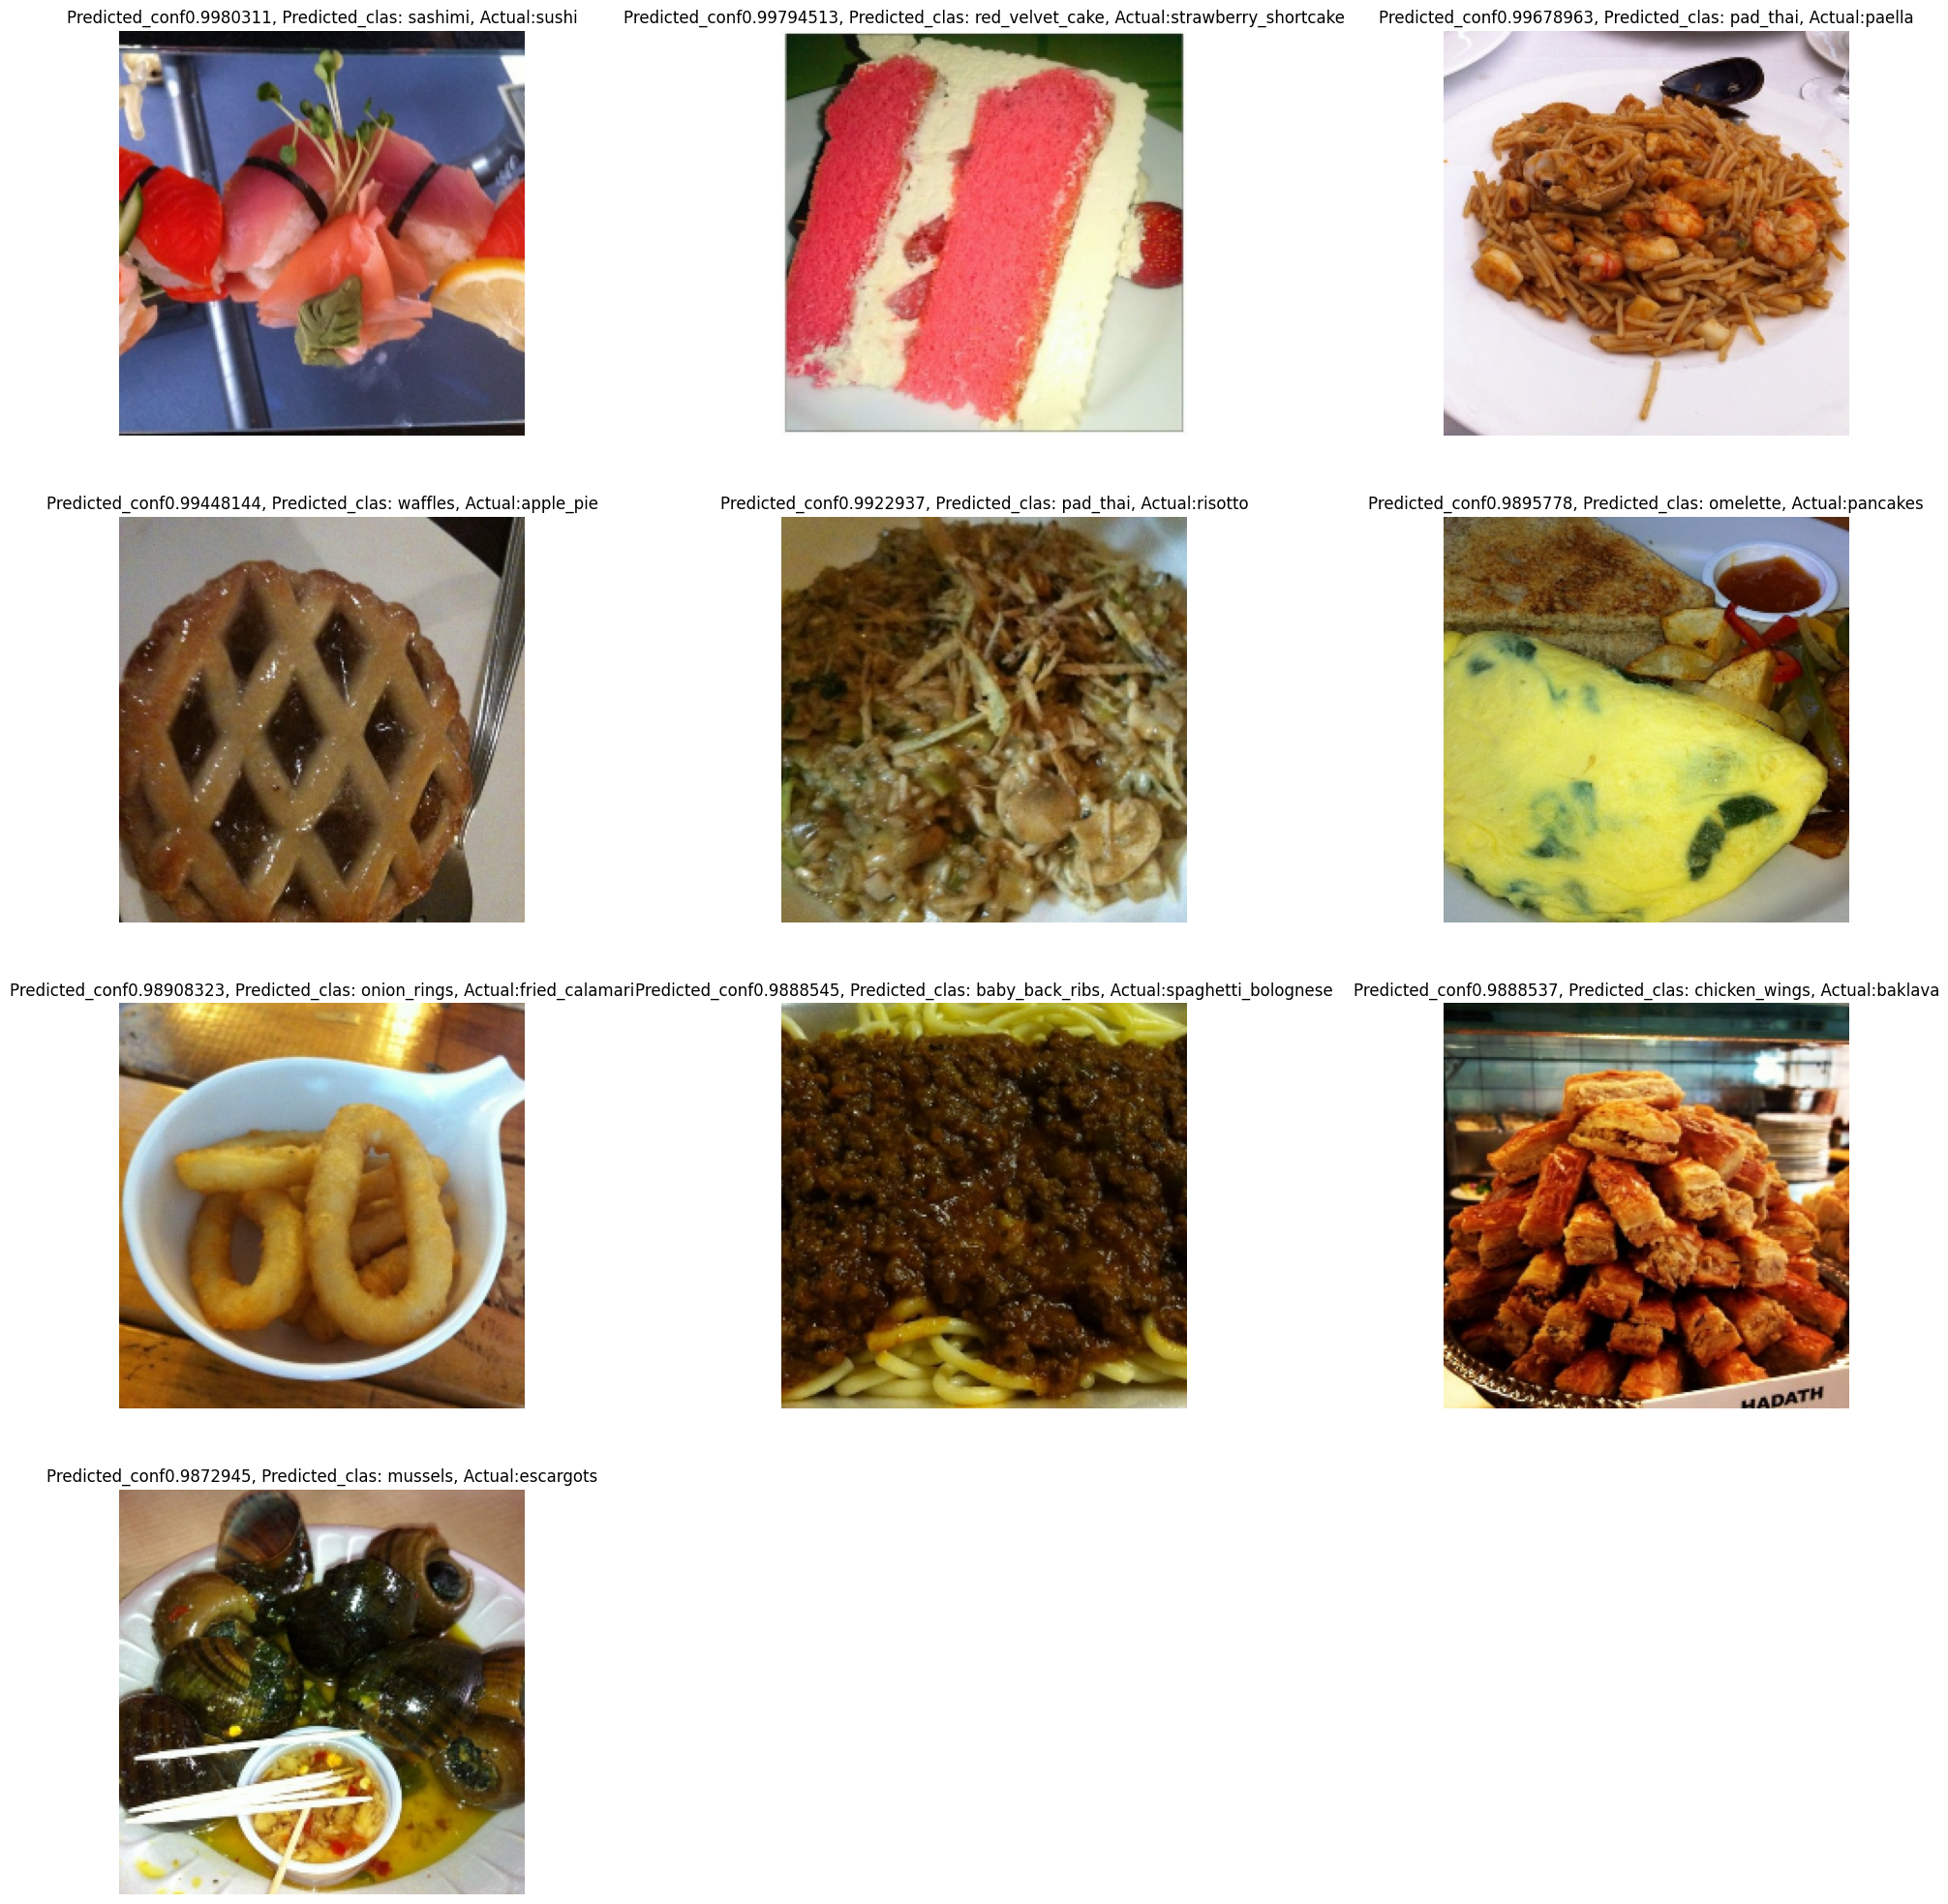

In [76]:
plt.figure(figsize=(25,25))

for x in range(1,11):

  path = pred_df_wrong['img_paths'].iloc[x-1]
  img = load_prep_images(path)

  plt.subplot(4,3,x)
  plt.imshow(img/255.)
  plt.title("Predicted_conf" +str(pred_df_wrong["pred_conf"].iloc[x-1]) + ", Predicted_clas: "+ str(pred_df_wrong["y_pred_class_name"].iloc[x-1]) + ", Actual:" + str(pred_df_wrong["y_true_class_name"].iloc[x-1]))
  plt.axis('off')

## predicting on own images

In [77]:
!wget https://sallysbakingaddiction.com/wp-content/uploads/2014/09/buttermilk-waffles-recipe.jpg

--2025-01-08 10:00:08--  https://sallysbakingaddiction.com/wp-content/uploads/2014/09/buttermilk-waffles-recipe.jpg
Resolving sallysbakingaddiction.com (sallysbakingaddiction.com)... 104.18.6.172, 104.18.7.172, 2606:4700::6812:7ac, ...
Connecting to sallysbakingaddiction.com (sallysbakingaddiction.com)|104.18.6.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138798 (136K) [image/jpeg]
Saving to: ‘buttermilk-waffles-recipe.jpg’

buttermilk-waffles- 100%[===================>] 135.54K  --.-KB/s    in 0.003s  

2025-01-08 10:00:08 (52.2 MB/s) - ‘buttermilk-waffles-recipe.jpg’ saved [138798/138798]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


(-0.5, 223.5, 223.5, -0.5)

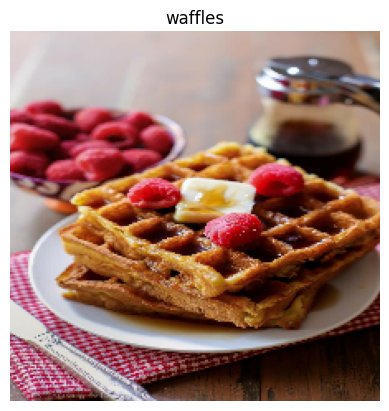

In [78]:
img = load_prep_images("/content/buttermilk-waffles-recipe.jpg")

plt.imshow(img/255.)

plt.imshow(img/255.)
plt.title(test_Data.class_names[int(tf.argmax(model_1.predict(tf.expand_dims(img, axis = 0)), axis = 1))])
plt.axis('off')